<a href="https://colab.research.google.com/github/ArunPratapTomar/BigDataProject/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=7e864195ba814aa143bdcf44b98027b7fbf344cd8310abf42240dd68fe239a44
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crop.csv to crop.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving district wise rainfall normal.csv to district wise rainfall normal.csv


In [ ]:
spark = SparkSession.builder.appName("Load CSV into DataFrame").master("local[*]").getOrCreate()

In [ ]:
df1 = spark.read.format("com.dtabricks.sparks.csv").option("mode","DROPMALFORMED").option("header", True).option("inferschema",True).csv("crop.csv")

In [ ]:
df1

DataFrame[State: string, District_Name: string, YEAR: int, Season: string, Crop: string, Area: double, Production: double]

In [ ]:
df1.show()

+--------------------+-------------+----+-----------+-------------------+-------+----------+
|               State|District_Name|YEAR|     Season|               Crop|   Area|Production|
+--------------------+-------------+----+-----------+-------------------+-------+----------+
|Andaman and Nicob...|     NICOBARS|2000|Kharif     |           Arecanut| 1254.0|    2000.0|
|Andaman and Nicob...|     NICOBARS|2000|Kharif     |Other Kharif pulses|    2.0|       1.0|
|Andaman and Nicob...|     NICOBARS|2000|Kharif     |               Rice|  102.0|     321.0|
|Andaman and Nicob...|     NICOBARS|2000|Whole Year |             Banana|  176.0|     641.0|
|Andaman and Nicob...|     NICOBARS|2000|Whole Year |          Cashewnut|  720.0|     165.0|
|Andaman and Nicob...|     NICOBARS|2000|Whole Year |           Coconut |18168.0|    6.51E7|
|Andaman and Nicob...|     NICOBARS|2000|Whole Year |         Dry ginger|   36.0|     100.0|
|Andaman and Nicob...|     NICOBARS|2000|Whole Year |          Sugarca

In [ ]:
from pyspark.sql.functions import upper


In [ ]:
df1 = df1.withColumn("State", upper(df1["State"]))

In [ ]:
df1.show()

+--------------------+-------------+----+-----------+-------------------+-------+----------+
|               State|District_Name|YEAR|     Season|               Crop|   Area|Production|
+--------------------+-------------+----+-----------+-------------------+-------+----------+
|ANDAMAN AND NICOB...|     NICOBARS|2000|Kharif     |           Arecanut| 1254.0|    2000.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Kharif     |Other Kharif pulses|    2.0|       1.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Kharif     |               Rice|  102.0|     321.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Whole Year |             Banana|  176.0|     641.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Whole Year |          Cashewnut|  720.0|     165.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Whole Year |           Coconut |18168.0|    6.51E7|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Whole Year |         Dry ginger|   36.0|     100.0|
|ANDAMAN AND NICOB...|     NICOBARS|2000|Whole Year |          Sugarca

In [ ]:
df2 = spark.read.format("com.dtabricks.sparks.csv").option("mode","DROPMALFORMED").option("header", True).option("inferschema",True).csv("rainfall in india 1901-2015.csv")

In [ ]:
df2.show()

+--------------------+----+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|         SUBDIVISION|YEAR|   JAN|   FEB|   MAR|   APR|   MAY|   JUN|   JUL|   AUG|   SEP|   OCT|   NOV|   DEC| ANNUAL|Jan-Feb|Mar-May|Jun-Sep|Oct-Dec|
+--------------------+----+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|ANDAMAN & NICOBAR...|1901| 49.20| 87.10| 29.20|  2.30|528.80|517.50|365.10|481.10|332.60|388.50|558.20| 33.60|3373.20| 136.30| 560.30|1696.30| 980.30|
|ANDAMAN & NICOBAR...|1902|  0.00|159.80| 12.20|  0.00|446.10|537.10|228.90|753.70|666.20|197.20|359.00|160.50|3520.70| 159.80| 458.30|2185.90| 716.70|
|ANDAMAN & NICOBAR...|1903| 12.70|144.00|  0.00|  1.00|235.10|479.90|728.40|326.70|339.00|181.20|284.40|225.00|2957.40| 156.70| 236.10|1874.00| 690.60|
|ANDAMAN & NICOBAR...|1904|  9.40| 14.70|  0.00|202.40|304.50|495.10|502.00|160.10|820.4

In [ ]:
df3 = spark.read.format("com.dtabricks.sparks.csv").option("mode","DROPMALFORMED").option("header", True).option("inferschema",True).csv("district wise rainfall normal.csv")

In [ ]:
df3.show()

+--------------------+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-------+-------+-------+-------+
|       STATE_UT_NAME|     DISTRICT|  JAN|  FEB|  MAR|  APR|  MAY|  JUN|  JUL|  AUG|  SEP|  OCT|  NOV|  DEC|ANNUAL|Jan-Feb|Mar-May|Jun-Sep|Oct-Dec|
+--------------------+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-------+-------+-------+-------+
|ANDAMAN And NICOB...|      NICOBAR|107.3| 57.9| 65.2|117.0|358.5|295.5|285.0|271.9|354.8|326.0|315.2|250.9|2805.2|  165.2|  540.7| 1207.2|  892.1|
|ANDAMAN And NICOB...|SOUTH ANDAMAN| 43.7| 26.0| 18.6| 90.5|374.4|457.2|421.3|423.1|455.6|301.2|275.8|128.3|3015.7|   69.7|  483.5| 1757.2|  705.3|
|ANDAMAN And NICOB...|N & M ANDAMAN| 32.7| 15.9|  8.6| 53.4|343.6|503.3|465.4|460.9|454.8|276.1|198.6|100.0|2913.3|   48.6|  405.6| 1884.4|  574.7|
|   ARUNACHAL PRADESH|        LOHIT| 42.2| 80.8|176.4|358.5|306.4|447.0|660.1|427.8|313.6|167.1| 34.1| 29.8|3043

In [ ]:
from pyspark.sql.functions import col

In [ ]:
df3 = df3.withColumnRenamed("STATE_UT_NAME", "State")

In [ ]:
df3.show()

+--------------------+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-------+-------+-------+-------+
|               State|     DISTRICT|  JAN|  FEB|  MAR|  APR|  MAY|  JUN|  JUL|  AUG|  SEP|  OCT|  NOV|  DEC|ANNUAL|Jan-Feb|Mar-May|Jun-Sep|Oct-Dec|
+--------------------+-------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-------+-------+-------+-------+
|ANDAMAN And NICOB...|      NICOBAR|107.3| 57.9| 65.2|117.0|358.5|295.5|285.0|271.9|354.8|326.0|315.2|250.9|2805.2|  165.2|  540.7| 1207.2|  892.1|
|ANDAMAN And NICOB...|SOUTH ANDAMAN| 43.7| 26.0| 18.6| 90.5|374.4|457.2|421.3|423.1|455.6|301.2|275.8|128.3|3015.7|   69.7|  483.5| 1757.2|  705.3|
|ANDAMAN And NICOB...|N & M ANDAMAN| 32.7| 15.9|  8.6| 53.4|343.6|503.3|465.4|460.9|454.8|276.1|198.6|100.0|2913.3|   48.6|  405.6| 1884.4|  574.7|
|   ARUNACHAL PRADESH|        LOHIT| 42.2| 80.8|176.4|358.5|306.4|447.0|660.1|427.8|313.6|167.1| 34.1| 29.8|3043

In [ ]:
df2 = df2.withColumnRenamed("SUBDIVISION", "State")

In [ ]:
df2.show()

+--------------------+----+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|               State|YEAR|   JAN|   FEB|   MAR|   APR|   MAY|   JUN|   JUL|   AUG|   SEP|   OCT|   NOV|   DEC| ANNUAL|Jan-Feb|Mar-May|Jun-Sep|Oct-Dec|
+--------------------+----+------+------+------+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+
|ANDAMAN & NICOBAR...|1901| 49.20| 87.10| 29.20|  2.30|528.80|517.50|365.10|481.10|332.60|388.50|558.20| 33.60|3373.20| 136.30| 560.30|1696.30| 980.30|
|ANDAMAN & NICOBAR...|1902|  0.00|159.80| 12.20|  0.00|446.10|537.10|228.90|753.70|666.20|197.20|359.00|160.50|3520.70| 159.80| 458.30|2185.90| 716.70|
|ANDAMAN & NICOBAR...|1903| 12.70|144.00|  0.00|  1.00|235.10|479.90|728.40|326.70|339.00|181.20|284.40|225.00|2957.40| 156.70| 236.10|1874.00| 690.60|
|ANDAMAN & NICOBAR...|1904|  9.40| 14.70|  0.00|202.40|304.50|495.10|502.00|160.10|820.4

In [ ]:
joined_df = df1.join(df2, ["State","YEAR"], "inner")


In [ ]:
joined_df.show()

+-----------------+----+-------------+-----------+-------------+------+----------+-----+------+------+------+------+------+------+------+------+------+-----+-----+-------+-------+-------+-------+-------+
|            State|YEAR|District_Name|     Season|         Crop|  Area|Production|  JAN|   FEB|   MAR|   APR|   MAY|   JUN|   JUL|   AUG|   SEP|   OCT|  NOV|  DEC| ANNUAL|Jan-Feb|Mar-May|Jun-Sep|Oct-Dec|
+-----------------+----+-------------+-----------+-------------+------+----------+-----+------+------+------+------+------+------+------+------+------+-----+-----+-------+-------+-------+-------+-------+
|ARUNACHAL PRADESH|2004|        ANJAW|Kharif     |        Maize|2453.0|    2674.0|38.00| 39.10|175.50|210.20|298.70|402.90|654.30|243.00|278.50|184.80| 5.60|15.20|2545.70|  77.10| 684.30|1578.70| 205.60|
|ARUNACHAL PRADESH|2004|        ANJAW|Kharif     |         Rice|3342.0|    1914.0|38.00| 39.10|175.50|210.20|298.70|402.90|654.30|243.00|278.50|184.80| 5.60|15.20|2545.70|  77.10| 684.

In [ ]:
joined_df = joined_df.withColumnRenamed("Annual", "Rainfall")

In [ ]:
df_merged = joined_df['State','YEAR','Season','Crop','Rainfall', 'Area','Production']

In [ ]:
from pyspark.sql.functions import  avg

# Assume the DataFrame is called `df` and contains a column `value` and a column `date` with the format 'yyyy-mm-dd'
df_avg_by_state = df_merged.groupBy('State').agg(avg('Rainfall').alias('avg_rainfall'),avg('Production').alias('avg_production')).orderBy('State')

# Show the resulting DataFrame
df_avg_by_state.show()
df_avg_by_state_pd = df_avg_by_state.toPandas()

+-----------------+------------------+-------------------+
|            State|      avg_rainfall|     avg_production|
+-----------------+------------------+-------------------+
|ARUNACHAL PRADESH|2504.1995679497627| 2681.3016110019653|
|            BIHAR| 1161.739888800616|  19417.37822719085|
|     CHHATTISGARH| 1274.152236436557|  9736.873843557098|
| HIMACHAL PRADESH|1134.0299518845038|   7249.66148208469|
|        JHARKHAND|1190.7740126382369|  8513.224131121651|
|           KERALA| 2841.861957286988|2.445167258948291E7|
|           PUNJAB| 499.1636936652942| 186568.56538339166|
|       TAMIL NADU| 840.6875470584001|  910330.3971754861|
|      UTTARAKHAND|1444.4504289216177| 27394.270466321243|
+-----------------+------------------+-------------------+



In [ ]:
from pyspark.sql.functions import  avg

# Assume the DataFrame is called `df` and contains a column `value` and a column `date` with the format 'yyyy-mm-dd'
df_avg_by_season = df_merged.groupBy('Season').agg(avg('Rainfall').alias('avg_rainfall'),avg('Production').alias('avg_production')).orderBy('Season')

# Show the resulting DataFrame
df_avg_by_season.show()
df_avg_by_season_pd = df_avg_by_season.toPandas()

+-----------+------------------+------------------+
|     Season|      avg_rainfall|    avg_production|
+-----------+------------------+------------------+
|Autumn     |1426.3012372634716| 21113.67310269484|
|Kharif     |1169.8753146531842| 23511.58198759502|
|Rabi       |1164.4859706037696|28053.122422638982|
|Summer     |1367.3305845511497| 9571.412934100419|
|Whole Year |1418.6516913370733|5484168.5296175545|
|Winter     |1569.6799603174704|  79467.0108937438|
+-----------+------------------+------------------+



In [ ]:
from pyspark.sql.functions import  avg

# Assume the DataFrame is called `df` and contains a column `value` and a column `date` with the format 'yyyy-mm-dd'
df_avg_by_year = df_merged.groupBy('YEAR').agg(avg('Rainfall').alias('avg_rainfall'),avg('Production').alias('avg_production')).orderBy('YEAR')

# Show the resulting DataFrame
df_avg_by_year.show()

+----+------------------+------------------+
|YEAR|      avg_rainfall|    avg_production|
+----+------------------+------------------+
|1997|1255.7062218214426|  177885.715509468|
|1998|1526.3185025480277|2064786.4373280944|
|1999|1350.7227016128813| 2344545.044534413|
|2000|1233.7839641721937|1651447.5053107673|
|2001| 1363.114819506027|1786950.2132780082|
|2002| 1009.605908607863|1249983.9431021898|
|2003|1173.4028379548952|1312519.4253704515|
|2004|1239.4266218035254| 1659746.294286102|
|2005|1265.3144692881128| 1691318.370152111|
|2006|1294.4803359955952|1760621.5704352774|
|2007|1539.2709022556458|1459042.0821233569|
|2008| 1284.275943270004|1646715.9632598513|
|2009| 1043.733197107867|1874003.6985093975|
|2010|1193.6291302942077|1771660.8541789579|
|2011|1282.4590136054533| 3538442.600757926|
|2012|1296.6051113201436|1924986.4758214285|
|2013|1300.5685556141223| 2907067.185807151|
|2014| 1375.404719971828|2190976.3085999275|
+----+------------------+------------------+



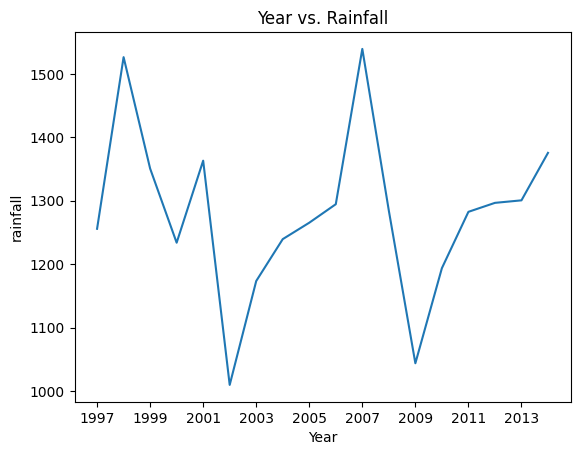

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# select the columns to plot
x = df_avg_by_year.select(col("Year")).collect()
y = df_avg_by_year.select(col("avg_rainfall")).collect()

# create a scatter plot
plt.plot(x, y)

# add axis labels and a title
plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.xlabel("Year")
plt.ylabel("rainfall")
plt.title("Year vs. Rainfall")

# show the plot
plt.show()


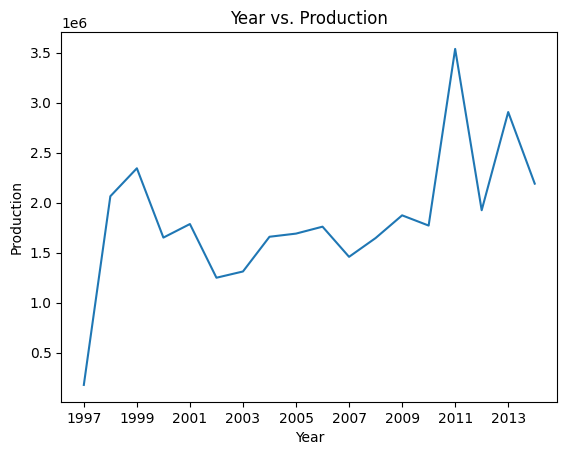

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# select the columns to plot
x = df_avg_by_year.select(col("Year")).collect()
y = df_avg_by_year.select(col("avg_production")).collect()

# create a plot
plt.plot(x, y)

# add axis labels and a title
plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.xlabel("Year")
plt.ylabel("Production")
plt.title("Year vs. Production")

# show the plot
plt.show()

In [ ]:
#df_merged.collect()

In [ ]:
df = df_merged.toPandas()


In [ ]:
df

,State,YEAR,Season,Crop,Rainfall,Area,Production
0,ARUNACHAL PRADESH,2004,Kharif,Maize,2545.70,2453.0,2674.0
1,ARUNACHAL PRADESH,2004,Kharif,Rice,2545.70,3342.0,1914.0
2,ARUNACHAL PRADESH,2004,Kharif,Small millets,2545.70,532.0,495.0
3,ARUNACHAL PRADESH,2004,Rabi,Wheat,2545.70,30.0,60.0
4,ARUNACHAL PRADESH,2004,Whole Year,Dry chillies,2545.70,13.0,18.0
...,...,...,...,...,...,...,...
61772,UTTARAKHAND,2014,Whole Year,Onion,1287.40,26.0,172.0
61773,UTTARAKHAND,2014,Whole Year,Pulses total,1287.40,5346.0,4630.0
61774,UTTARAKHAND,2014,Whole Year,Rice,1287.40,9919.0,16499.0
61775,UTTARAKHAND,2014,Whole Year,Sunflower,1287.40,3.0,3.0


Text(0, 0.5, 'Production')

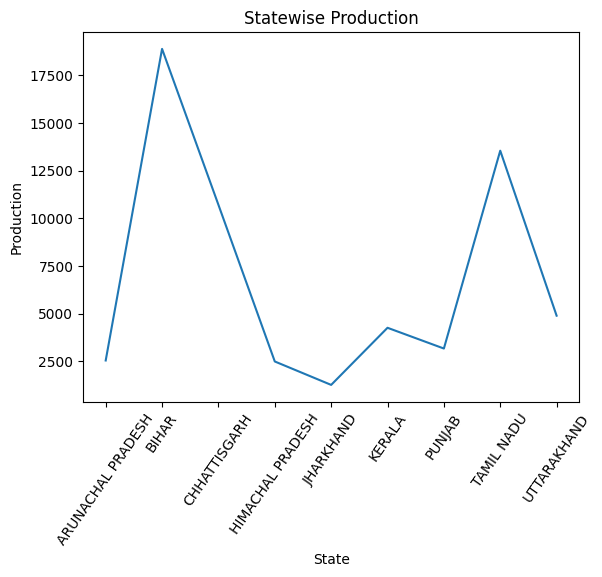

In [ ]:
perf_by_state=df.groupby('State').size()
plot_by_state=perf_by_state.plot(title="Statewise Production",rot=55)
plot_by_state.set_xlabel('State')
plot_by_state.set_ylabel('Production')

<ipython-input-35-b05e1c2ec413>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  perf_by_state=df.groupby('Rainfall').median()


Text(0, 0.5, 'Production')

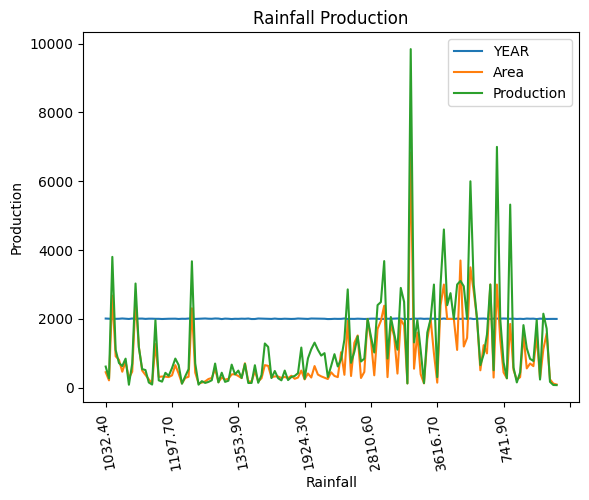

In [ ]:
perf_by_state=df.groupby('Rainfall').median()
plot_by_state=perf_by_state.plot(title="Rainfall Production",rot=100)
plot_by_state.set_xlabel('Rainfall')
plot_by_state.set_ylabel('Production')

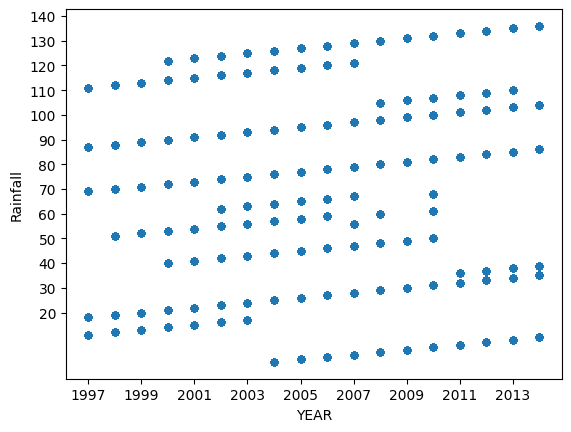

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a scatter plot
df.plot.scatter(x='YEAR', y='Rainfall')

# set the x-axis tick locations and labels
plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.yticks(range(20, 150, 10), [str(year) for year in range(20, 150, 10)])

# show the plot
plt.show()



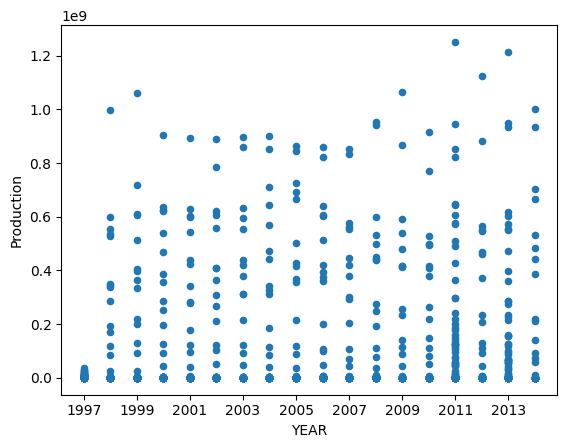

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a scatter plot
df.plot.scatter(x='YEAR', y='Production')

# set the x-axis tick locations and labels
plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])

# show the plot
plt.show()


In [ ]:
per = lambda x:((0,1)[x > 10000])
df['Perf'] = df['Production'].apply(per)

In [ ]:
df

,State,YEAR,Season,Crop,Rainfall,Area,Production,Perf
0,ARUNACHAL PRADESH,2004,Kharif,Maize,2545.70,2453.0,2674.0,0
1,ARUNACHAL PRADESH,2004,Kharif,Rice,2545.70,3342.0,1914.0,0
2,ARUNACHAL PRADESH,2004,Kharif,Small millets,2545.70,532.0,495.0,0
3,ARUNACHAL PRADESH,2004,Rabi,Wheat,2545.70,30.0,60.0,0
4,ARUNACHAL PRADESH,2004,Whole Year,Dry chillies,2545.70,13.0,18.0,0
...,...,...,...,...,...,...,...,...
61772,UTTARAKHAND,2014,Whole Year,Onion,1287.40,26.0,172.0,0
61773,UTTARAKHAND,2014,Whole Year,Pulses total,1287.40,5346.0,4630.0,0
61774,UTTARAKHAND,2014,Whole Year,Rice,1287.40,9919.0,16499.0,1
61775,UTTARAKHAND,2014,Whole Year,Sunflower,1287.40,3.0,3.0,0


In [ ]:
df.isnull().sum()

State            0
YEAR             0
Season           0
Crop             0
Rainfall         0
Area             0
Production    1031
Perf             0
dtype: int64

In [ ]:
df_updated = df.dropna()

In [ ]:
df_updated.isnull().sum()

State         0
YEAR          0
Season        0
Crop          0
Rainfall      0
Area          0
Production    0
Perf          0
dtype: int64

Text(0, 0.5, 'Rainfall')

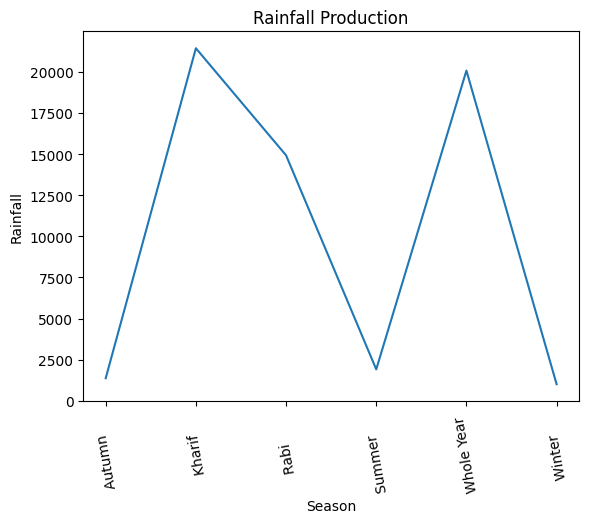

In [ ]:
perf_by_state=df_updated.groupby('Season').size()
plot_by_state=perf_by_state.plot(title="Rainfall Production",rot=100)
plot_by_state.set_xlabel('Season')
plot_by_state.set_ylabel('Rainfall')


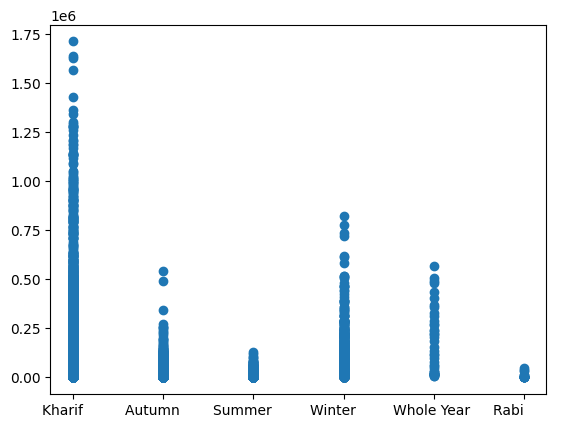

In [ ]:
rice_data = df[df['Crop']=='Rice']
plt.scatter(rice_data['Season'],rice_data['Production'])

In [ ]:
df_updated

,State,YEAR,Season,Crop,Rainfall,Area,Production,Perf
0,ARUNACHAL PRADESH,2004,Kharif,Maize,2545.70,2453.0,2674.0,0
1,ARUNACHAL PRADESH,2004,Kharif,Rice,2545.70,3342.0,1914.0,0
2,ARUNACHAL PRADESH,2004,Kharif,Small millets,2545.70,532.0,495.0,0
3,ARUNACHAL PRADESH,2004,Rabi,Wheat,2545.70,30.0,60.0,0
4,ARUNACHAL PRADESH,2004,Whole Year,Dry chillies,2545.70,13.0,18.0,0
...,...,...,...,...,...,...,...,...
61772,UTTARAKHAND,2014,Whole Year,Onion,1287.40,26.0,172.0,0
61773,UTTARAKHAND,2014,Whole Year,Pulses total,1287.40,5346.0,4630.0,0
61774,UTTARAKHAND,2014,Whole Year,Rice,1287.40,9919.0,16499.0,1
61775,UTTARAKHAND,2014,Whole Year,Sunflower,1287.40,3.0,3.0,0


<ipython-input-46-4a29920087ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_updated.corr()


[Text(0.5, 0, 'YEAR'),
 Text(1.5, 0, 'Area'),
 Text(2.5, 0, 'Production'),
 Text(3.5, 0, 'Perf')]

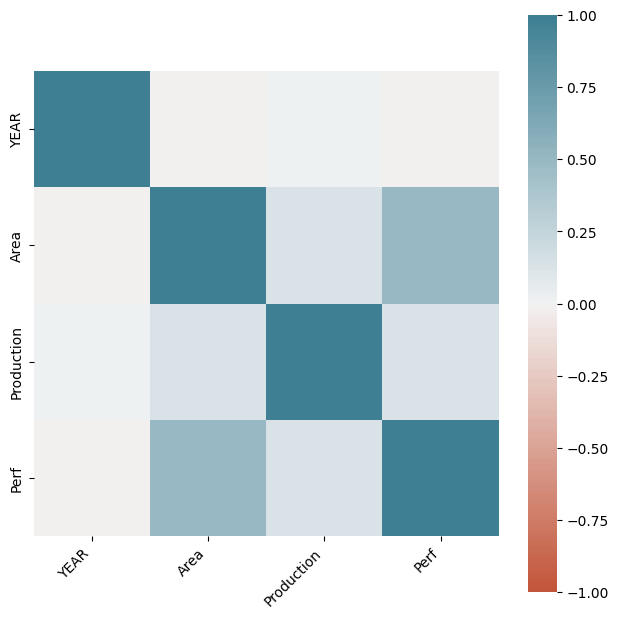

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df_updated.corr()
plt.subplots(figsize=(7.5,7.5))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

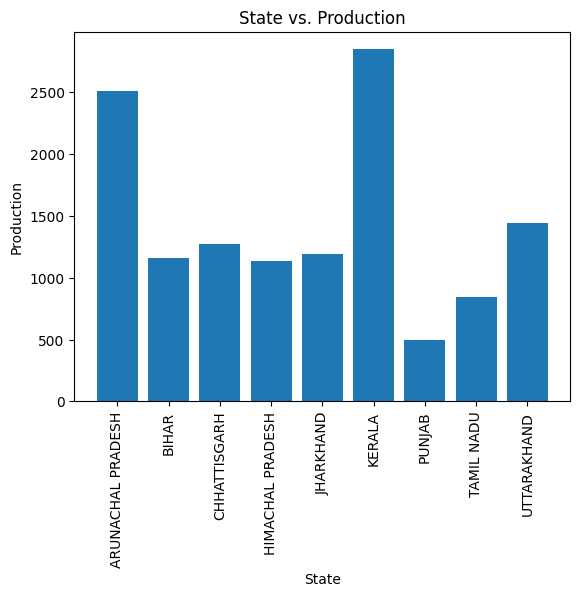

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# select the columns to plot
x = df_avg_by_state_pd["State"]
y= df_avg_by_state_pd["avg_rainfall"]
#y = df.select(col("Production")).collect()

# create a plot
plt.bar(x, y)

# add axis labels and a title
#plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.xlabel("State")
plt.ylabel("Production")
plt.title("State vs. Production")
plt.xticks(rotation=90)
# show the plot
plt.show()

In [ ]:
import pandas as pd

# Load CSV file into DataFrame
df_c = pd.read_csv('crop.csv')

# Replace missing values with a default value
df_c.dropna()

# Save DataFrame back to CSV file
df_c.to_csv('crop_drop.csv', index=False)


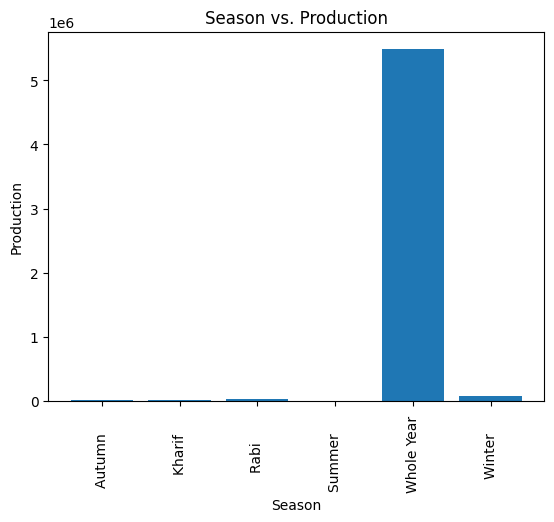

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# select the columns to plot
x = df_avg_by_season_pd["Season"]
y= df_avg_by_season_pd["avg_production"]
#y = df.select(col("Production")).collect()

# create a plot
plt.bar(x, y)

# add axis labels and a title
#plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.xlabel("Season")
plt.ylabel("Production")
plt.title("Season vs. Production")
plt.xticks(rotation=90)
# show the plot
plt.show()

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   9571.4129341 ,  557031.12460245, 1104490.83627079,
        1651950.54793914, 2199410.25960748, 2746869.97127583,
        3294329.68294417, 3841789.39461252, 4389249.10628086,
        4936708.81794921, 5484168.52961755]),
 <BarContainer object of 10 artists>)

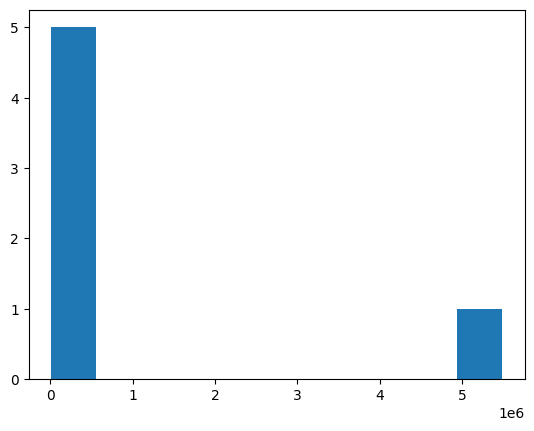

In [ ]:
plt.hist(y)

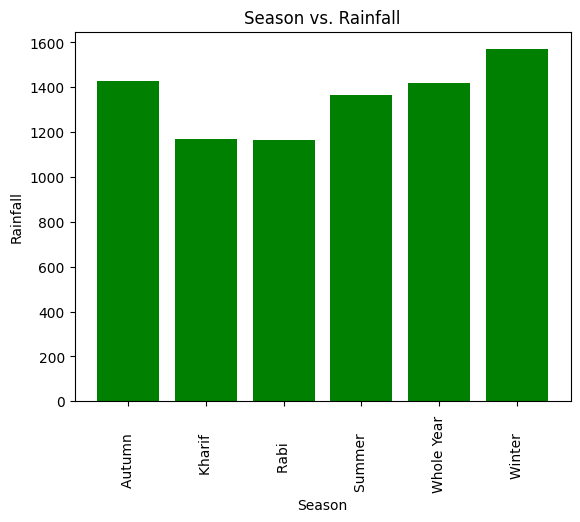

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# select the columns to plot
x = df_avg_by_season_pd["Season"]
y= df_avg_by_season_pd["avg_rainfall"]
#y = df.select(col("Production")).collect()

# create a plot
plt.bar(x, y, color = 'green')

# add axis labels and a title
#plt.xticks(range(1997, 2015, 2), [str(year) for year in range(1997, 2015, 2)])
plt.xlabel("Season")
plt.ylabel("Rainfall")
plt.title("Season vs. Rainfall")
plt.xticks(rotation=90)
# show the plot
plt.show()

In [ ]:
df


,State,YEAR,Season,Crop,Rainfall,Area,Production,Perf
0,ARUNACHAL PRADESH,2004,Kharif,Maize,2545.70,2453.0,2674.0,0
1,ARUNACHAL PRADESH,2004,Kharif,Rice,2545.70,3342.0,1914.0,0
2,ARUNACHAL PRADESH,2004,Kharif,Small millets,2545.70,532.0,495.0,0
3,ARUNACHAL PRADESH,2004,Rabi,Wheat,2545.70,30.0,60.0,0
4,ARUNACHAL PRADESH,2004,Whole Year,Dry chillies,2545.70,13.0,18.0,0
...,...,...,...,...,...,...,...,...
61772,UTTARAKHAND,2014,Whole Year,Onion,1287.40,26.0,172.0,0
61773,UTTARAKHAND,2014,Whole Year,Pulses total,1287.40,5346.0,4630.0,0
61774,UTTARAKHAND,2014,Whole Year,Rice,1287.40,9919.0,16499.0,1
61775,UTTARAKHAND,2014,Whole Year,Sunflower,1287.40,3.0,3.0,0


In [ ]:
X = df[['YEAR','Rainfall','Area']]
y = df[['Perf']]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.9169634185820654

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted)
cm

array([[14789,   366],
       [ 1173,  2206]])

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.9475774401423037

In [ ]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.8690825987593862

In [ ]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.660218253968254

Text(0, 0.5, 'True Positive Rate')

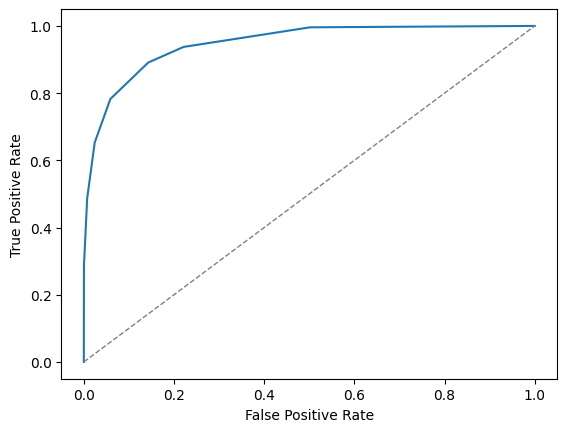

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state=13)
model.fit(train_x, train_y)
predicted = model.predict(test_x)
acc = model.score(test_x, test_y)
print("accuracy"+str(acc))



<ipython-input-62-bfb2b043be2e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


accuracy0.8962986942915723


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted)
cm

array([[14231,   924],
       [  998,  2381]])

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])


0.9242480263868993

In [ ]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9947069943289225

In [ ]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9787946428571429

Text(0, 0.5, 'True Positive Rate')

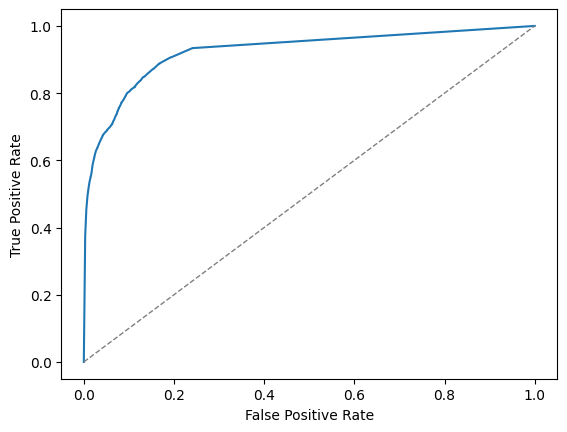

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=13)
model.fit(train_x, train_y)
predicted = model.predict(test_x)
acc = model.score(test_x, test_y)
print("accuracy"+str(acc))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy0.9199309377360526


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, predicted)
cm

array([[14639,   516],
       [  968,  2411]])

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.9574578228777135

In [ ]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.8401562273976566

In [ ]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.7202380952380952

Text(0, 0.5, 'True Positive Rate')

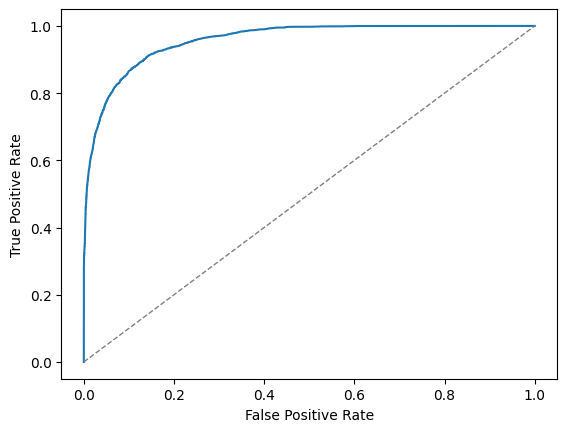

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')